# 1 Objective
The objective of this assignment is to explore and evaluate different regression models to accurately predict and better understand thefactors that influence target variable. We will use the California Housing dataset to predict the target(median house value) based on other features. This dataset is popular in machine learning used for regression tasks. It contains information about the housing prices in various districts in California, based on the 1990census. The dataset can be directly accessed from the scikit-learn,which is a famous machine learning library in python. I decided to use this dataset because it is an ideal starting point for anyone passionate about regression and machine learning techniques and developing predictive models for real-world application.

We will define the target variable and analyse it with other features to find the correlations, provide insights into how these factors can be optimized so that we can accurately predict the medium house value.

# 2 Gather Data

## 2.1 Python Libraries

In [1]:
# Import the California housing dataset from the Scikit-learn library
from sklearn.datasets import fetch_california_housing

# Import the train_test_split function from Scikit-learn for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import Pandas library for working with dataframes
import pandas as pd

# Import Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.gofplots import qqplot
import matplotlib.cm as cm


# Import NumPy library for numerical operations
import numpy as np

# Import the LinearRegression class from Scikit-learn for performing linear regression
from sklearn.linear_model import LinearRegression

# Import the statsmodels.api library for building statistical models
import statsmodels.api as sm

# Import the variance_inflation_factor function from statsmodels.stats.outliers_influence for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline


## 2.2 Load the dataset

In [2]:
# load the data to varaible
housing = fetch_california_housing()

In [3]:
# understand the type of data
type(housing.data) # It is a multi-dimentional array

numpy.ndarray

In [4]:
# understand the shape of data
housing.data.shape

(20640, 8)

In [5]:
# description of the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
# understand the feature of dataset
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
# transfer the data to pandas data frame
data = pd.DataFrame(data=housing.data, columns= housing.feature_names)
# add the target variable (MedHouseVal) to dataframe
data['MedHouseVal'] =  housing.target #  * 100000

In [8]:
# This code creates a Pandas DataFrame called profile that summarizes several key statistics
# for the California Housing dataset, including the minimum, mean, and maximum values of various features
# such as median house value, median income, average number of rooms, and so on. 
# The dic dictionary is used to specify the names and descriptions of 
# each feature, as well as its corresponding minimum, mean, and maximum values.
# When we call this profile, it will give the information about the dataset values and each 
#feature description.


dic = {
    'Description': {
        'MedHouseVal':'median house value ($100,000)',
        'MedInc':'median income in block group (600 to 3,000)',
        'HouseAge':'median house age in block group (600 to 3,000 people)',
        'AveRooms':'average number of rooms per household',
        'AveBedrms':'average number of bedrooms per household',
        'Population':'block group population (600 to 3,000 people)',
        'AveOccup':'average number of household members',
        'Latitude':'block group latitude',
        'Longitude':'block group longitud',
            },
    
    

    'Min': {
        'MedHouseVal': data['MedHouseVal'].min(),
        'MedInc': data['MedInc'].min(),
        'HouseAge': data['HouseAge'].min(),
        'AveRooms': data['AveRooms'].min(),
        'AveBedrms': data['AveBedrms'].min(),
        'Population': data['Population'].min(),
        'AveOccup': data['AveOccup'].min(),
        'Latitude': data['Latitude'].min(),
        'Longitude': data['Longitude'].min(),
    },
        'Mean': {
        'MedHouseVal': data['MedHouseVal'].mean(),
        'MedInc': data['MedInc'].mean(),
        'HouseAge': data['HouseAge'].mean(),
        'AveRooms': data['AveRooms'].mean(),
        'AveBedrms': data['AveBedrms'].mean(),
        'Population': data['Population'].mean(),
        'AveOccup': data['AveOccup'].mean(),
        'Latitude': data['Latitude'].mean(),
        'Longitude': data['Longitude'].mean(),
    },
        'Max': {
        'MedHouseVal': data['MedHouseVal'].max(),
        'MedInc': data['MedInc'].max(),
        'HouseAge': data['HouseAge'].max(),
        'AveRooms': data['AveRooms'].max(),
        'AveBedrms': data['AveBedrms'].max(),
        'Population': data['Population'].max(),
        'AveOccup': data['AveOccup'].max(),
        'Latitude': data['Latitude'].max(),
        'Longitude': data['Longitude'].max(),
    },

}

        
profile = pd.DataFrame(dic)
profile

Description         Min  \
MedHouseVal                      median house value ($100,000)    0.149990   
MedInc             median income in block group (600 to 3,000)    0.499900   
HouseAge     median house age in block group (600 to 3,000 ...    1.000000   
AveRooms                 average number of rooms per household    0.846154   
AveBedrms             average number of bedrooms per household    0.333333   
Population        block group population (600 to 3,000 people)    3.000000   
AveOccup                   average number of household members    0.692308   
Latitude                                  block group latitude   32.540000   
Longitude                                 block group longitud -124.350000   

                    Mean           Max  
MedHouseVal     2.068558      5.000010  
MedInc          3.870671     15.000100  
HouseAge       28.639486     52.000000  
AveRooms        5.429000    141.909091  
AveBedrms       1.096675     34.066667  
Population   1425.476744  35682.000000  
AveOccup        3.070655   1243.333333  
Latitude       35.631861     41.950000  
Longitude    -119.569704   -114.310000

# 3 Clean and Explor the data

In [9]:
# explore the 5 top rows of the dataset
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [10]:
# explore the 5 last rows of the dataset
data.tail()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894

In [11]:
# show the number of rows. Totally there are 20640
# records and bellow function shows that there is no null value
data.count()

MedInc         20640
HouseAge       20640
AveRooms       20640
AveBedrms      20640
Population     20640
AveOccup       20640
Latitude       20640
Longitude      20640
MedHouseVal    20640
dtype: int64

In [12]:
# this fuction also shows that there is no null value in the entire dataset
pd.isnull(data).any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

In [13]:
# this function shows the data types of each columns null and non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Note:
The above methods identified that the dataset does not have any missing data and, therefore, 
I don't need to performe any cleaning and replacing operations. 
Normally, if there is missing or null values, I can replace them using bellow methods.

Check for missing values use the following method
df.isna()

Fill missing values with the mean of the column, use the following method
df.fillna(df.mean(), inplace=True)

I can drop the rows having missing value using the following method
df.dropna(inplace=True)

## 3.1 Visualizing 

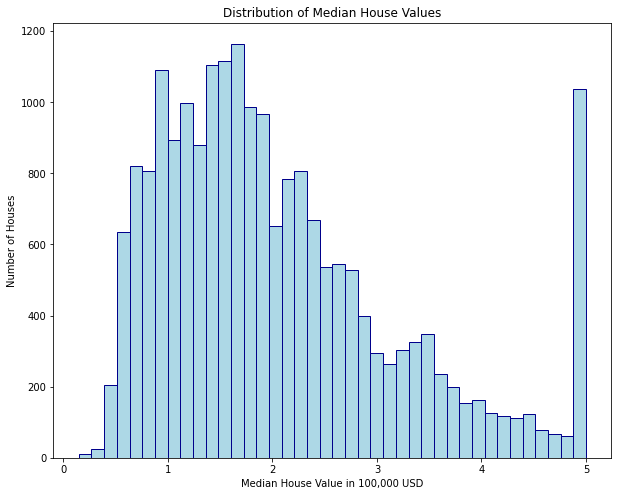

In [14]:
# Set the figure size to 10x8 inches
plt.figure(figsize=(10, 8))

# Get the median house value (target variable)
target = data['MedHouseVal']

# Generate the histogram with 40 bins
plt.hist(target, bins=40, ec='darkblue', color='lightblue')

# Set the x-axis label
plt.xlabel('Median House Value in 100,000 USD')

# Set the y-axis label
plt.ylabel('Number of Houses')

# Set the Title
plt.title('Distribution of Median House Values')

# Display the chart
plt.show()


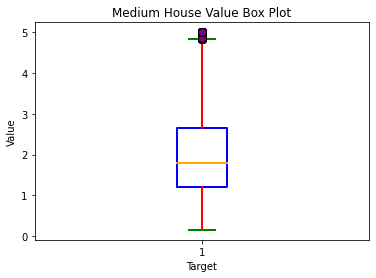

In [15]:
# Define box, whisker, cap, flier and median properties with different values
boxprops = dict(linewidth=2, color='blue')
whiskerprops = dict(linewidth=2, color='red')
capprops = dict(linewidth=2, color='green')
flierprops = dict(marker='o', markerfacecolor='purple', markersize=8, linestyle='none')
medianprops = dict(linewidth=2, color='orange')

# Add labels to the x-axis, y-axis and title of the boxplot
plt.xlabel('Target')
plt.ylabel('Value')
plt.title('Medium House Value Box Plot')

# Create a boxplot with the previously defined properties
plt.boxplot(target, boxprops=boxprops, whiskerprops=whiskerprops, 
            capprops=capprops, flierprops=flierprops, medianprops=medianprops)

# Display the boxplot
plt.show()

Note:
The above two charts shows that the distribution of median house values is slightly right-skewed, with a peak around 200,000 USD. There are fewer houses in the higher price ranges (above 500,000 USD) than in the lower price ranges. 
The tail on the right side of the histogram is longer than the tail on the left side. This indicates that the data is not normally distributed.

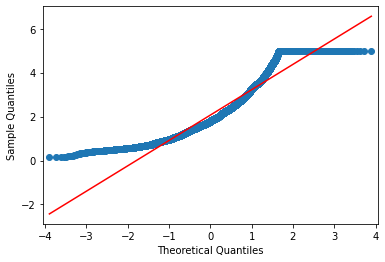

In [16]:
qqplot(data['MedHouseVal'], line='s')
plt.show()

Note:
The plot shows that the target variable does not follow a perfectly normal distribution, as the points deviate from the straight line in the tails of the plot. However, the deviation is not significant, indicating that the target variable can be approximated by a normal distribution.    

## 3.2 Descriptive Statistics


In [17]:

# Calculate the descriptive statistics
mean = data.mean()
median = data.median()
mode = data.mode().iloc[0]
range = data.max() - data.min()
variance = data.var()
std_dev = data.std()

# Print the results
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nRange:\n", range)
print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_dev)


Mean:
 MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

Median:
 MedInc            3.534800
HouseAge         29.000000
AveRooms          5.229129
AveBedrms         1.048780
Population     1166.000000
AveOccup          2.818116
Latitude         34.260000
Longitude      -118.490000
MedHouseVal       1.797000
dtype: float64

Mode:
 MedInc           3.12500
HouseAge        52.00000
AveRooms         5.00000
AveBedrms        1.00000
Population     891.00000
AveOccup         3.00000
Latitude        34.06000
Longitude     -118.31000
MedHouseVal      5.00001
Name: 0, dtype: float64

Range:
 MedInc            14.500200
HouseAge          51.000000
AveRooms         141.062937
AveBedrms         33.733333
Population     35679.000000
AveOccup        1242.641026
Latitude           9.410000
Longi

In [18]:
# Get statistics for target variable (Medium House Value)
target_min = np.min(target)
target_max = np.max(target)
target_mean = np.mean(target)
target_median = np.median(target)
target_variance = np.var(target)
target_std_dev = np.std(target)

# Print statistics
print("Target variable (Medium House Value) statistics:")
print(f"Minimum: {target_min}")
print(f"Maximum: {target_max}")
print(f"Mean: {target_mean}")
print(f"Median: {target_median}")
print(f"Variance: {target_variance}")
print(f"Standard Deviation: {target_std_dev}")


Target variable (Medium House Value) statistics:
Minimum: 0.14999
Maximum: 5.00001
Mean: 2.068558169089147
Median: 1.797
Variance: 1.3315503000818076
Standard Deviation: 1.1539282040412253


In [19]:
data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [20]:
target.value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: MedHouseVal, Length: 3842, dtype: int64

Note:
From these descriptive statistics, we can see that the dataset is relatively large, with a range spanning from 14999.000000000002 to 500000.99999999994. The mean is greater than the median, which suggests that the data is skewed towards higher values. The standard deviation is relatively high, which indicates that there is a significant amount of variability in the data.
The standard deviation of the dataset is 115392.82040412253. This is the square root of the variance and indicates that the values in the dataset deviate from the mean by an average of approximately 115393.

## 3.3 Correlation

In [21]:
data.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

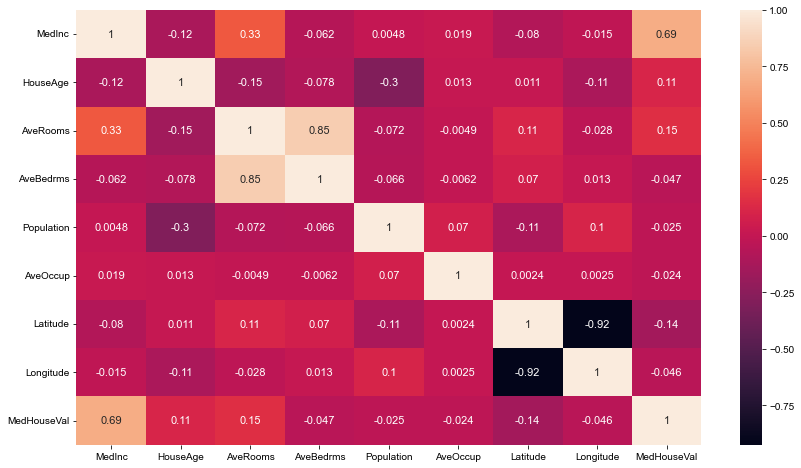

In [22]:
# Set the figure size to be 14 inches wide and 8 inches tall
plt.figure(figsize=(14,8))

# Create a heatmap of the correlation matrix for the data, with annotations and font size 11
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 11})

# Set the style of the plot to 'white'
sns.set_style('white')

# Set the font size for the x-axis tick labels to 10
plt.xticks(fontsize=10)

# Set the font size for the y-axis tick labels to 10
plt.yticks(fontsize=10)

# Display the plot
plt.show()


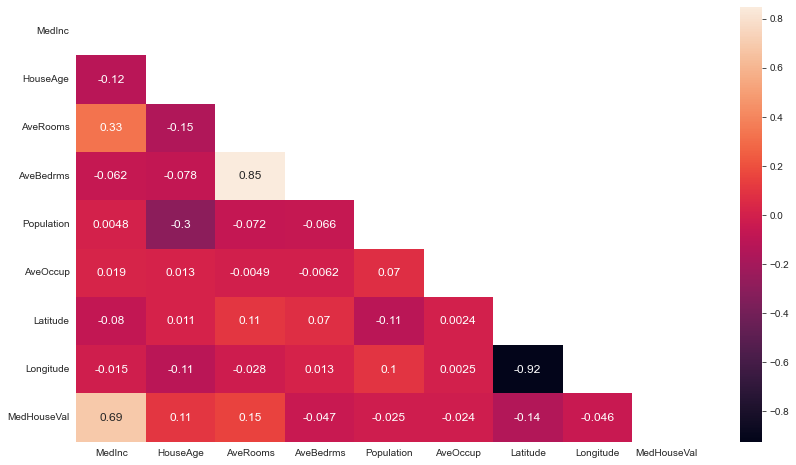

In [23]:
 maskvaraible = np.zeros_like(data.corr()) 
# This line initializes a 2D array called mask with the same shape as the correlation matrix 
# of the data dataset, with all values set to 0. This is done using the NumPy function zeros_like.

 triangle_indices = np.triu_indices_from(maskvaraible)
# This line creates a tuple of two 1D arrays that contain the row and column indices of 
# the upper triangle of the mask array. This is done using the NumPy function triu_indices_from.

 maskvaraible[triangle_indices] = True 
# This line sets all the values in the upper triangle of the mask array to True,
# based on the indices in the triangle_indices tuple. This is done to create the mask,
# which will later be used to hide the lower triangle of the correlation matrix.
# Set the figure size to be 14 inches wide and 8 inches tall

plt.figure(figsize=(14,8))

# Create a heatmap of the correlation matrix for the data, with annotations and font size 11
sns.heatmap(data.corr(), annot=True, mask=maskvaraible,annot_kws={"size": 12})

# Set the style of the plot to 'white'
sns.set_style('white')

# Set the font size for the x-axis tick labels to 10
plt.xticks(fontsize=10)

# Set the font size for the y-axis tick labels to 10
plt.yticks(fontsize=10)

# Display the plot
plt.show()

Note:

The strongest correlation is between the target variable and Median Income, with a correlation coefficient of 0.688, indicating a strong positive correlation. This suggests that as the median income of households in a district increases, so does the median house value. This relationship is not surprising, as higher-income households may be more likely to live in more expensive homes.

The other features have weak or very weak correlations with the target variable, suggesting that they may have little predictive power on their own. However, it is possible that some of these features may have more predictive power when combined with other features in a machine learning model.

Overall, the analysis of the correlation between the California Housing dataset target and features suggests that Median Income is the most important feature for predicting median house value. However, a machine learning model that combines multiple features may be necessary to accurately predict median house value in California districts.


 ### 3.3.1 Positive Correlation


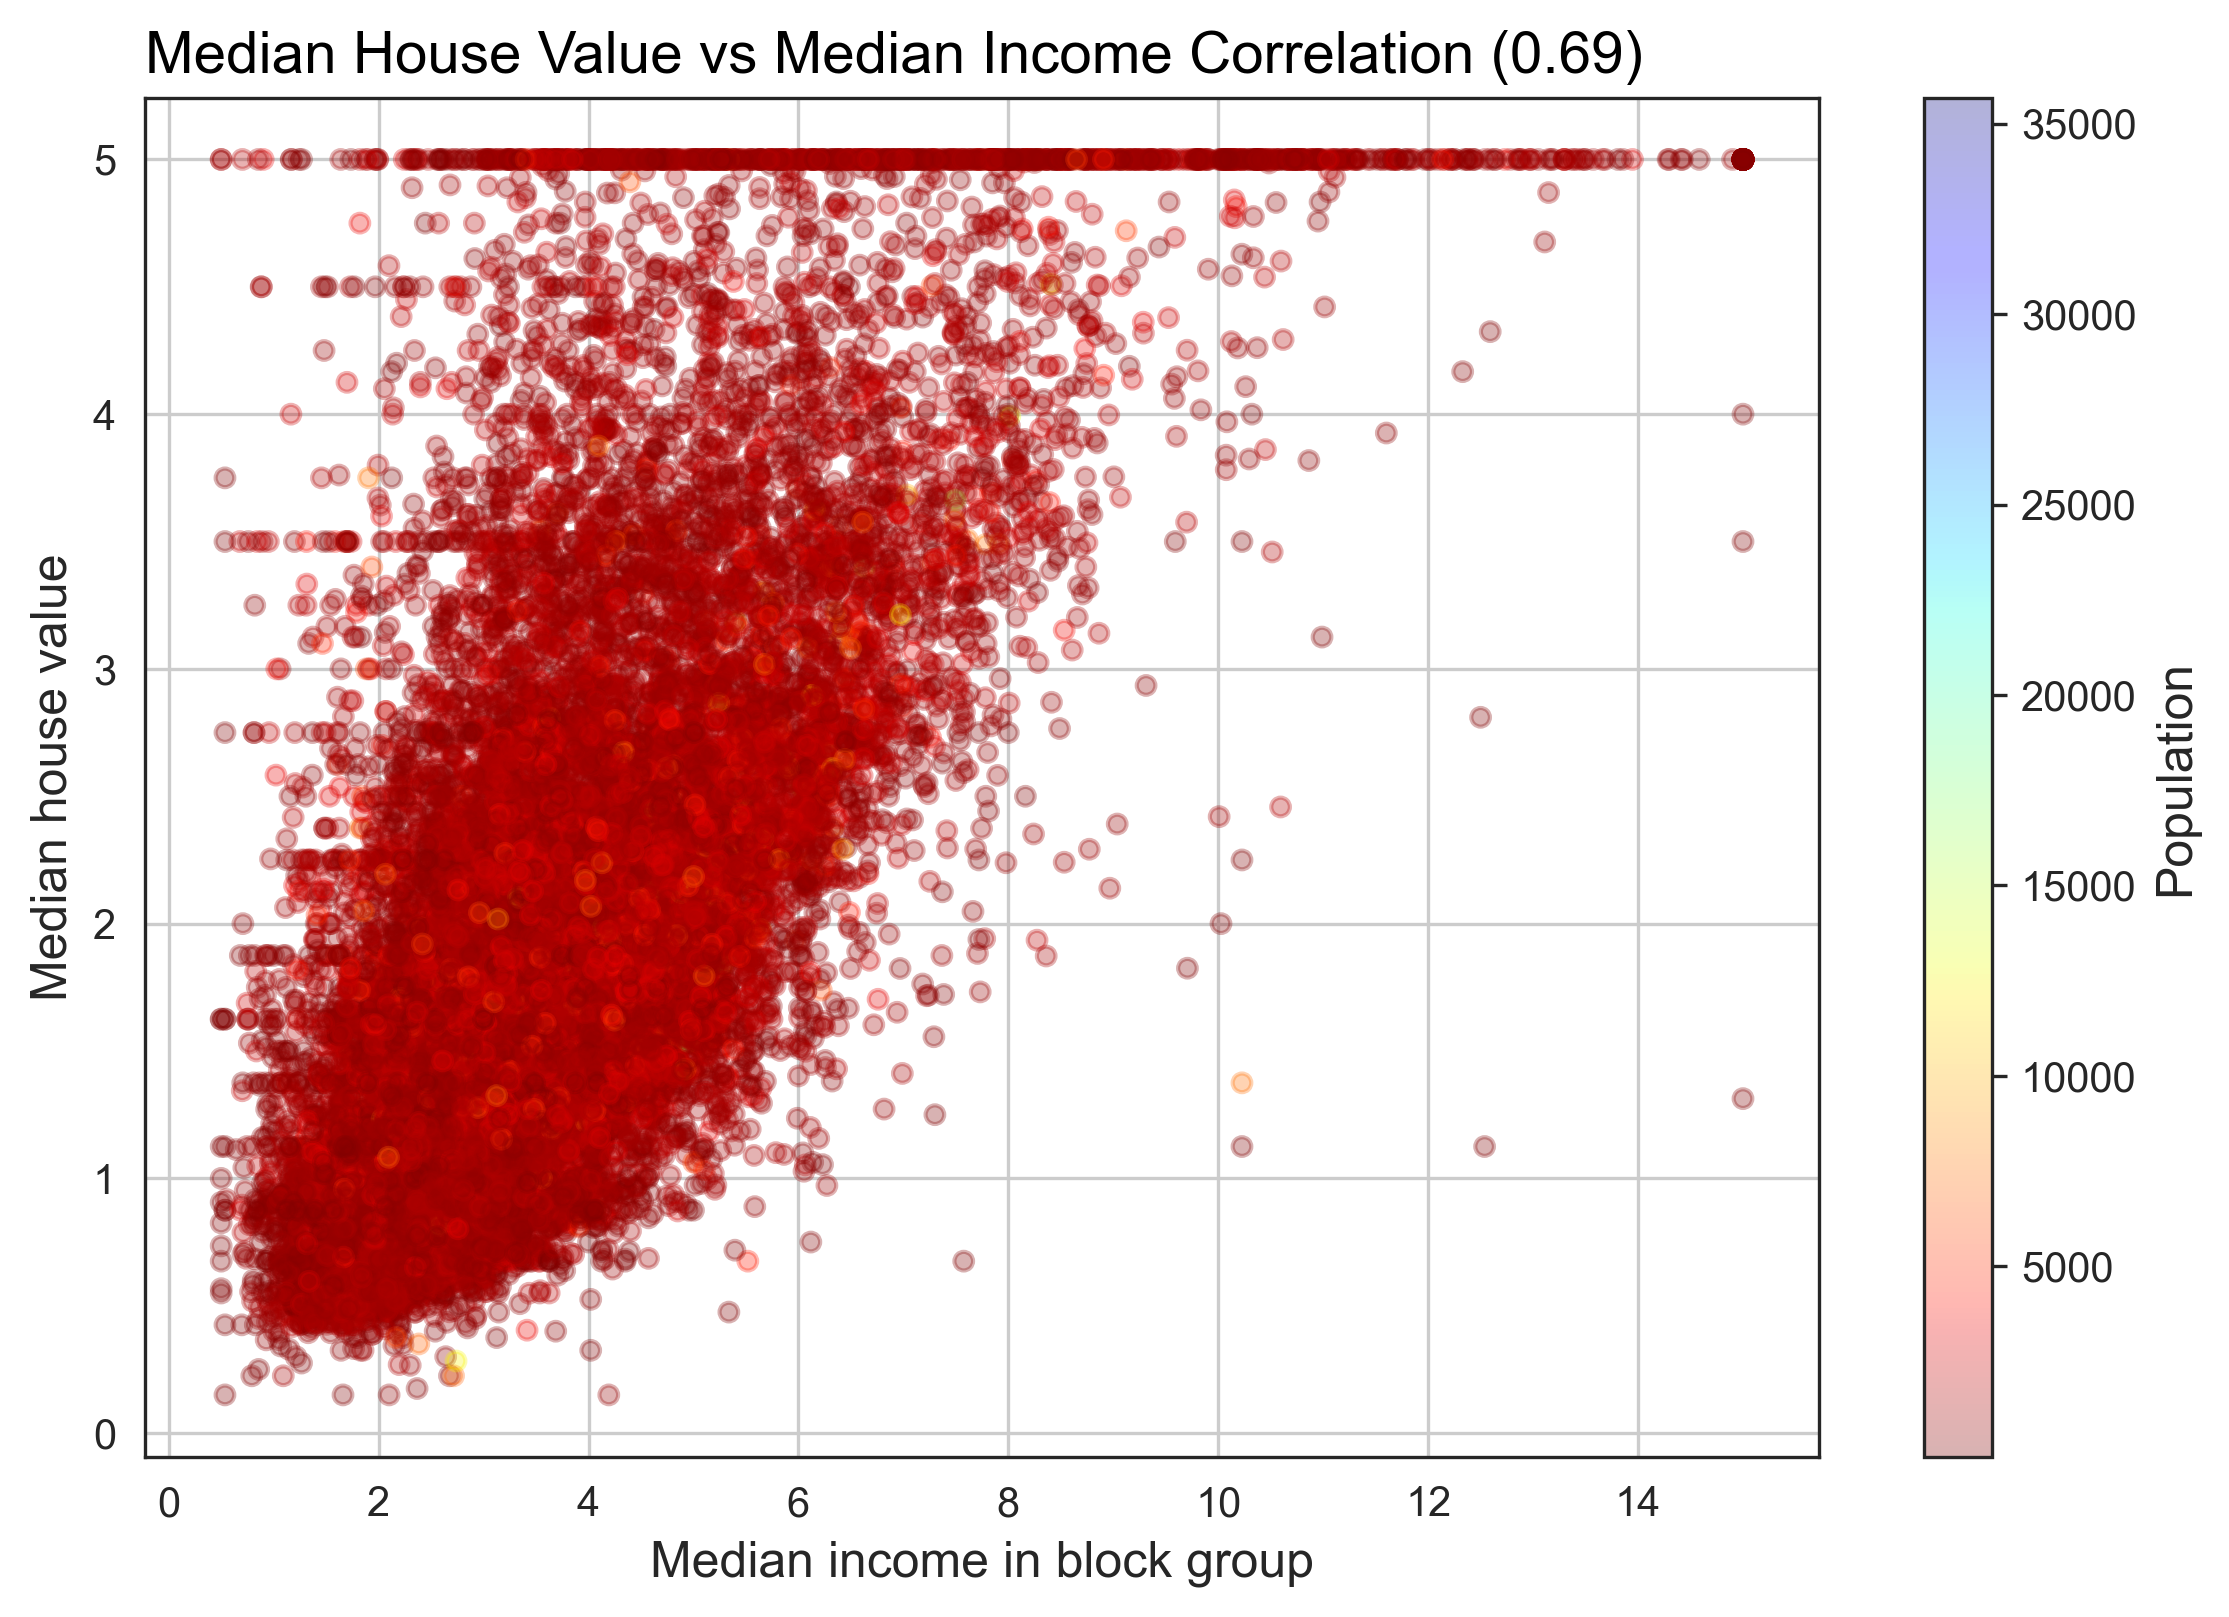

In [24]:
# Calculate correlation between Median House Value and Median Income rounded to 2 decimal places
MidHouseVal_MedInc = round(data['MedHouseVal'].corr(data['MedInc']), 2)

# Create a figure with specified size and dpi
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# Create a scatter plot of Median Income vs Median House Value with specified parameters
im = ax.scatter(x=data['MedInc'], y=data['MedHouseVal'], alpha=0.3, s=20, c=data['Population'], cmap=cm.jet_r)

# Set the title of the plot with the calculated correlation value, left aligned with specified fontsize and color
ax.set_title(f'Median House Value vs Median Income Correlation ({MidHouseVal_MedInc})', fontsize=14, color='black', loc='left')

# Set the x-axis label with specified fontsize
ax.set_xlabel('Median income in block group', fontsize=12)

# Set the y-axis label with specified fontsize
ax.set_ylabel('Median house value', fontsize=12)

# Add a colorbar legend to the plot
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Population', fontsize=12)

# Set the grid lines for both the x and y axis
ax.grid(True)


# Show the plot
plt.show()


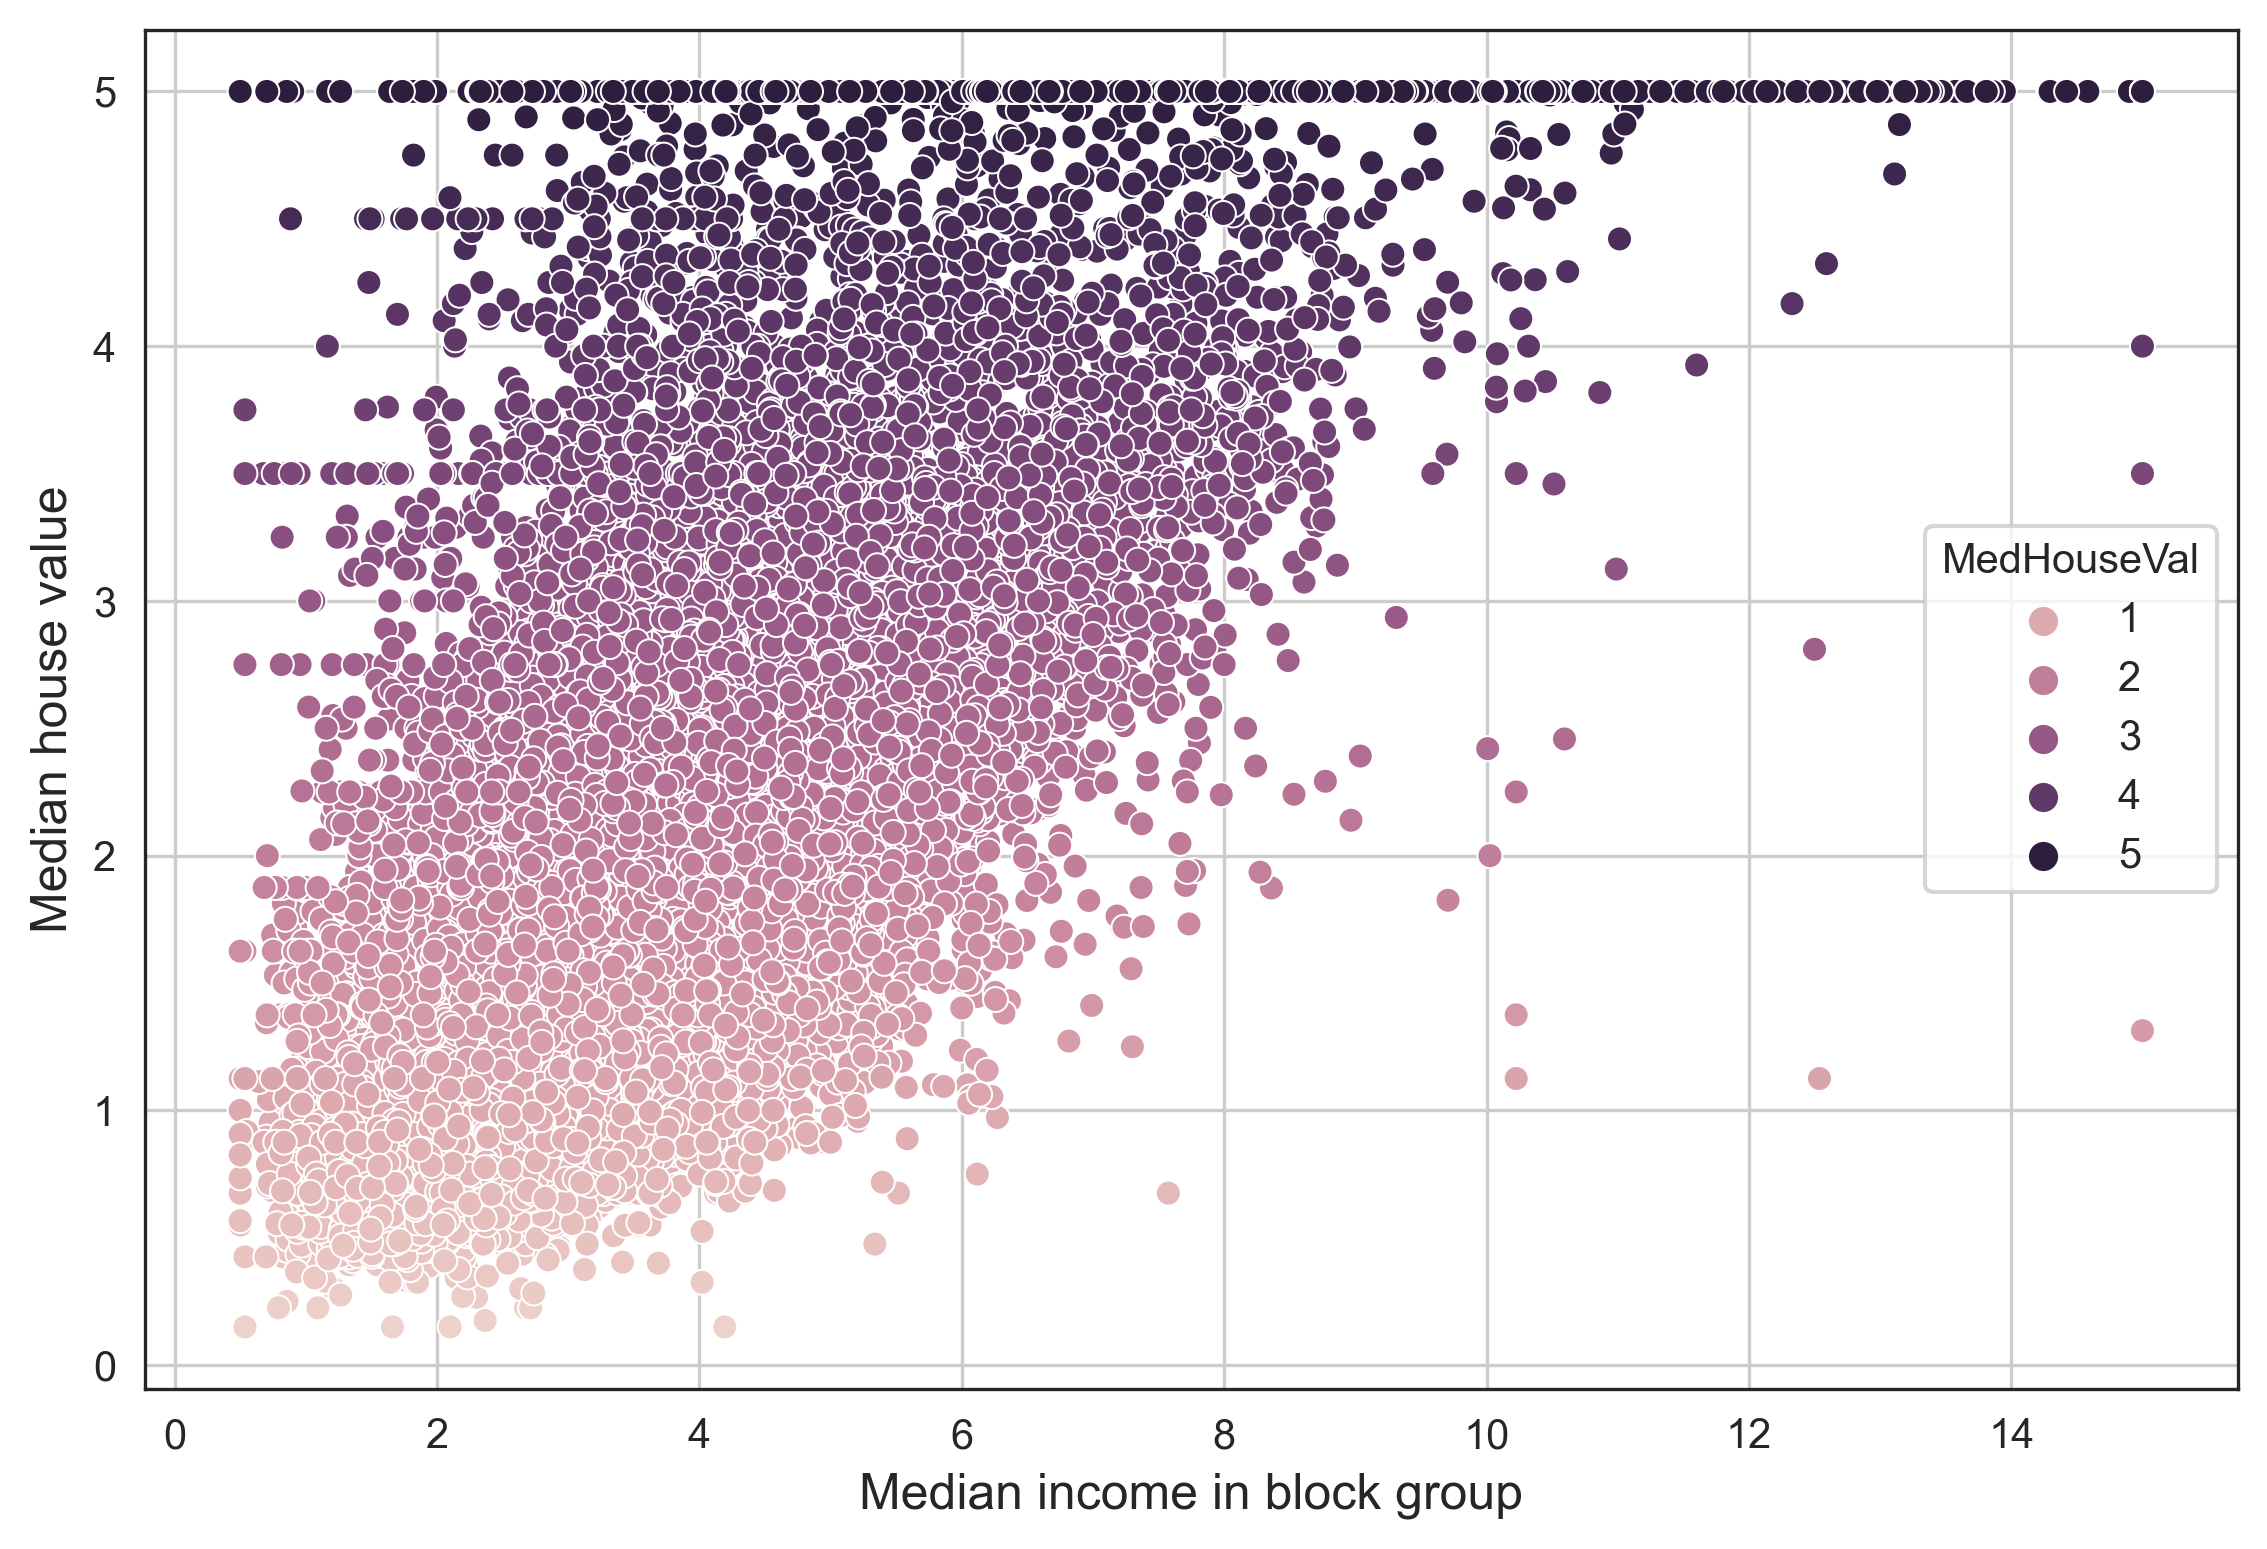

In [25]:

# Calculate correlation between Median House Value and Median Income rounded to 2 decimal places
# this is used to generate dynamic title
MidHouseVal_MedInc = round(data['MedHouseVal'].corr(data['MedInc']),2)

# Create a figure with specified size and dpi
plt.figure(figsize=(9,6), dpi=300)

# Create a scatter plot of Median Income vs Median House Value with specified parameters
sns.scatterplot(data=data, x='MedInc', y='MedHouseVal', color='darkred', hue='MedHouseVal')


# Set the x-axis label with specified fontsize
plt.xlabel('Median income in block group', fontsize=12)

# Set the y-axis label with specified fontsize
plt.ylabel('Median house value', fontsize=12)

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()


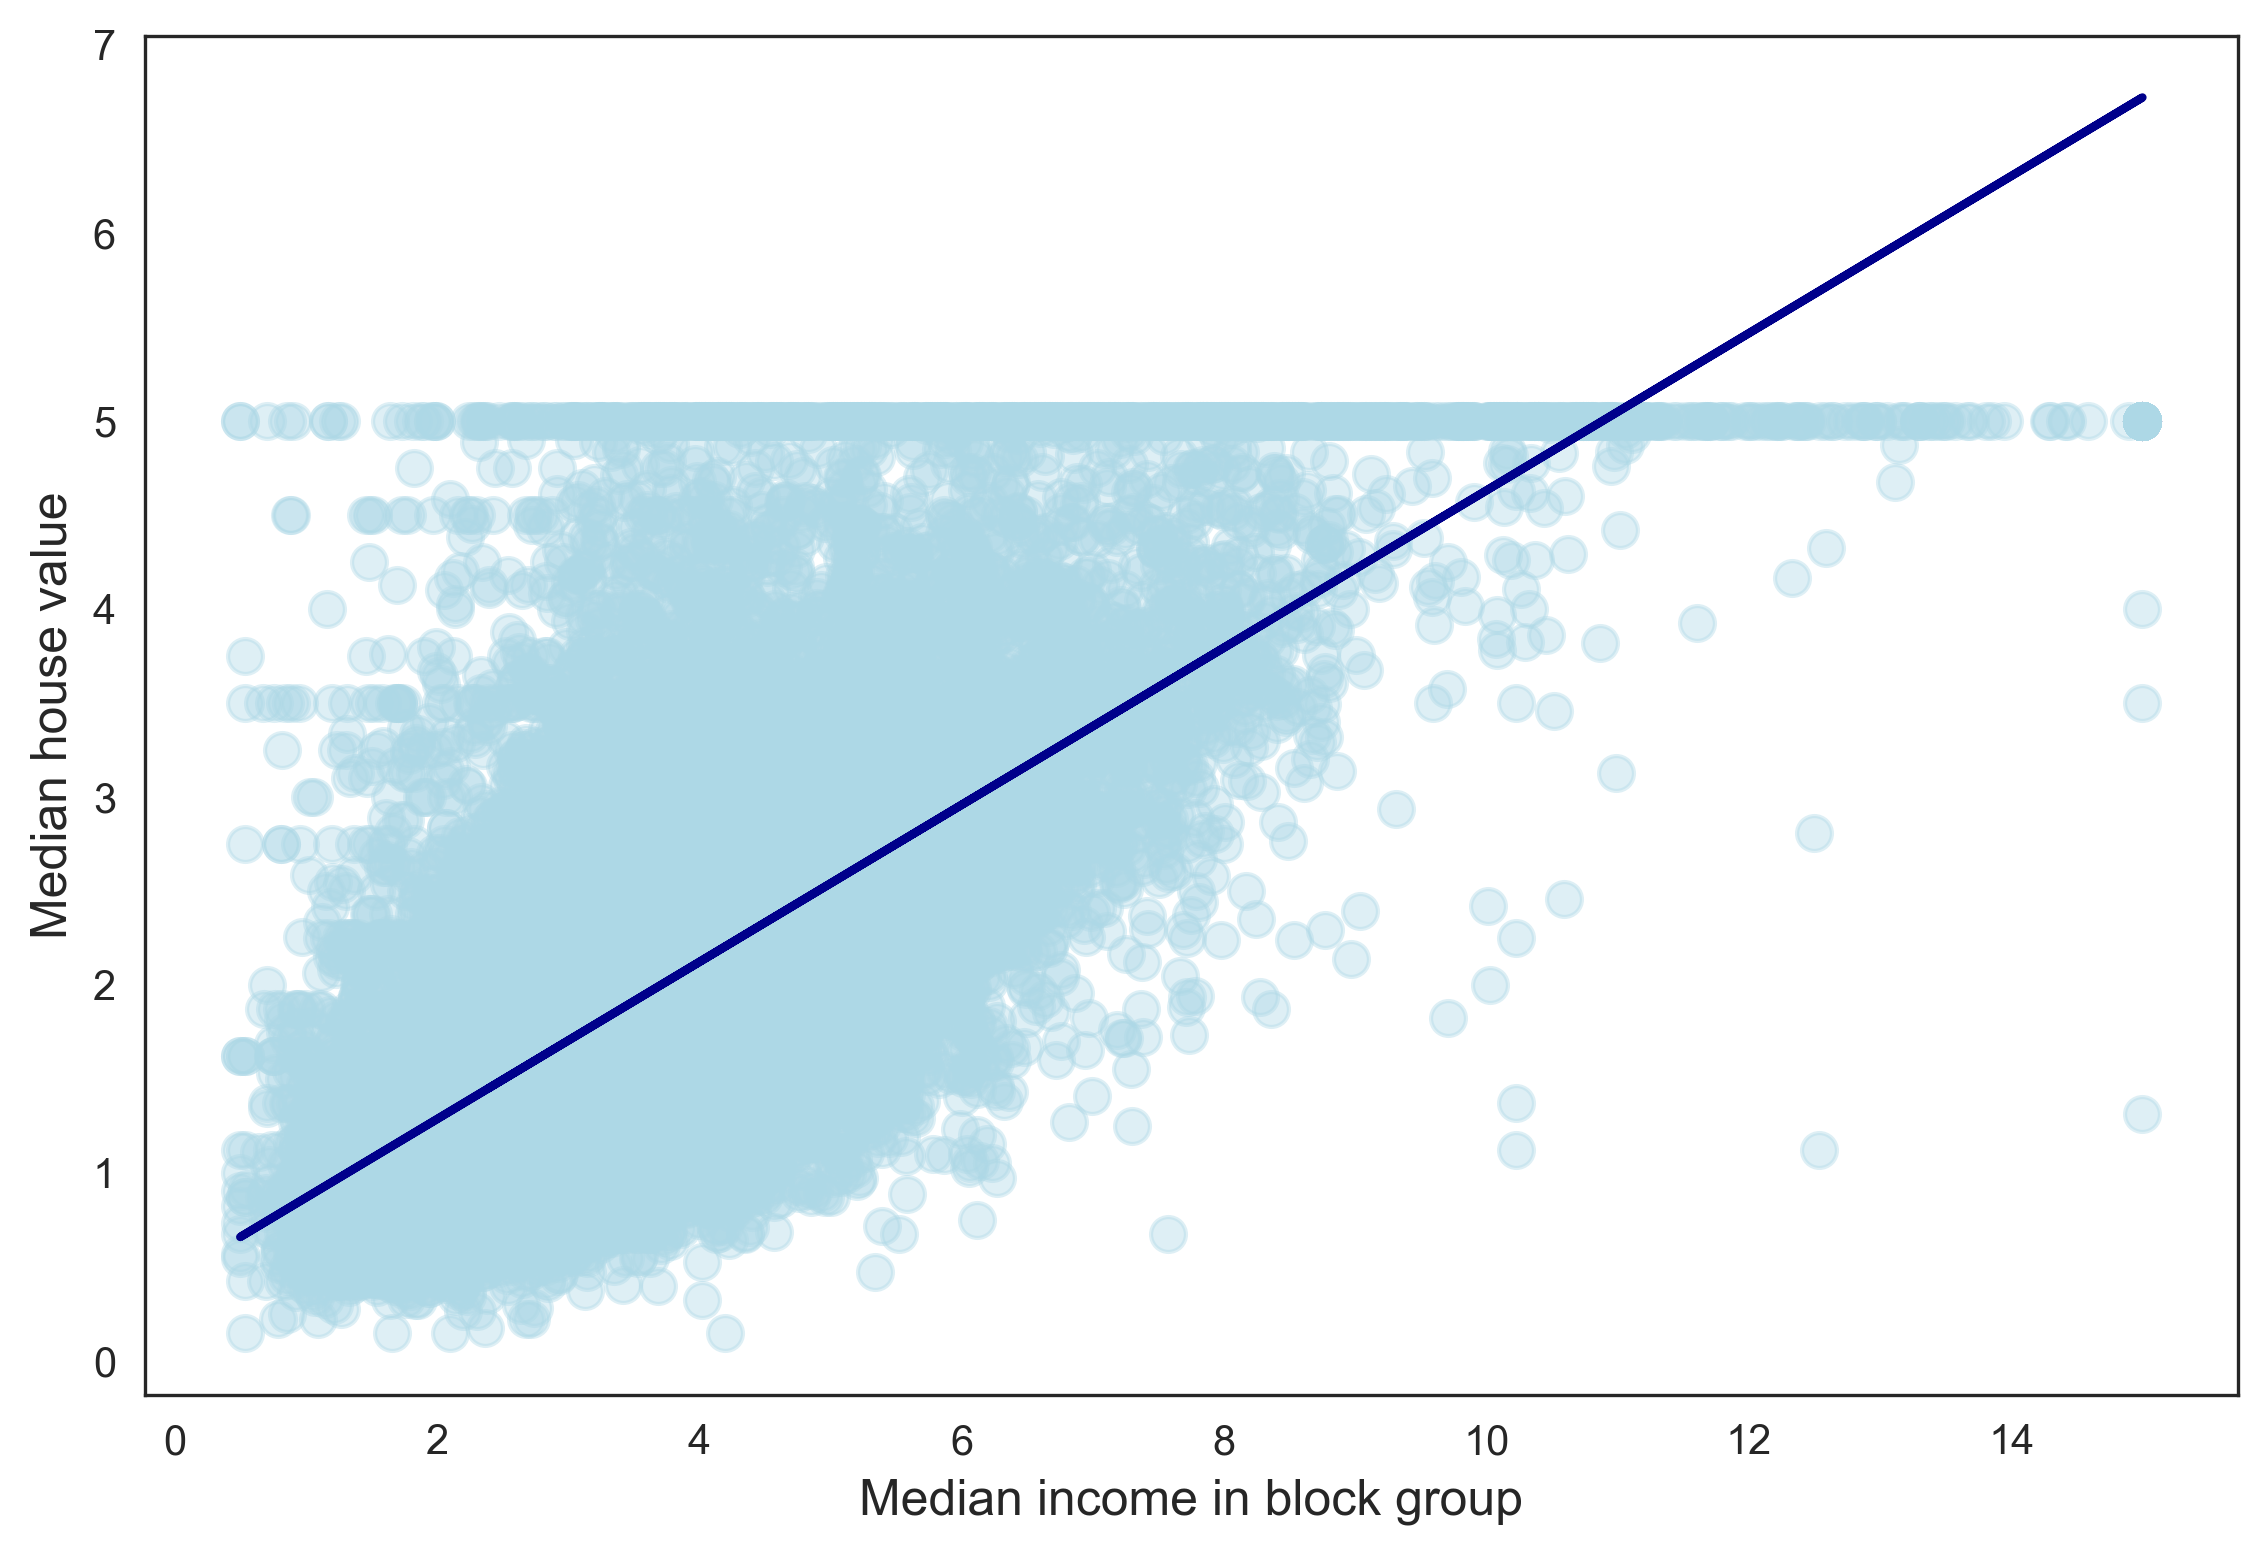

In [26]:
# Create a new DataFrame `X` that contains only the 'MedInc' feature column
X = pd.DataFrame(data, columns=['MedInc']) # Feature

# Create a new DataFrame `y` that contains only the 'MedHouseVal' target column
y = pd.DataFrame(data, columns=['MedHouseVal']) # Target

# Create a new LinearRegression object
reg = LinearRegression()

# Fit the LinearRegression model on the feature and target data
reg.fit(X,y)
# Calculate correlation between Median House Value and Median Income rounded to 2 decimal places
# this is used to generate dynamic title
MidHouseVal_MedInc = round(data['MedHouseVal'].corr(data['MedInc']),2)

# Create a figure with specified size and dpi
plt.figure(figsize=(9,6), dpi=300)

# Create a scatter plot of Median Income vs Median House Value with specified parameters
plt.scatter(x=data['MedInc'], y=data['MedHouseVal'], alpha=0.4,s=70, color='lightblue')

# Set the title of the plot with the calculated correlation value, left aligned with specified fontsize and color
#plt.title(f'Median House Value vs Median Income Correlation ({MidHouseVal_MedInc})',loc='left',
 #         fontsize=12, color='darkblue')

# Set the x-axis label with specified fontsize
plt.xlabel('Median income in block group', fontsize=12)

# Set the y-axis label with specified fontsize
plt.ylabel('Median house value', fontsize=12)

# Plot the feature data points and the LinearRegression model predictions
plt.plot(X, reg.predict(X), color='darkblue', linewidth=2)
plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

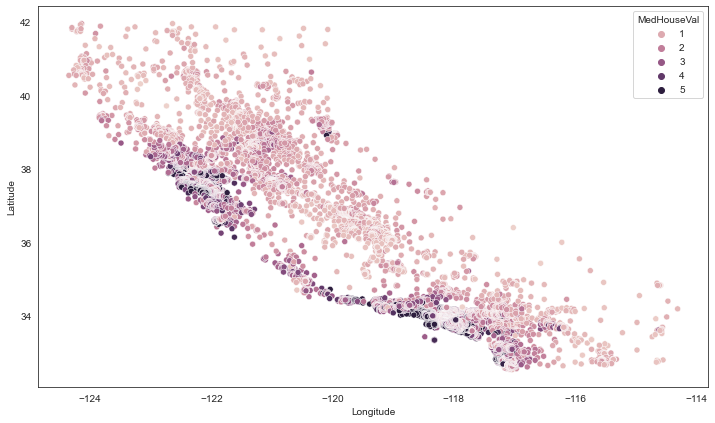

In [27]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = data, x='Longitude', y='Latitude',color='darkred', hue='MedHouseVal')


Note:
The plot shows the geographical distribution of median house values across California. The darker colors indicate higher median house values, while the lighter colors indicate lower median house values.

Overall, the plot suggests that the highest median house values are found along the coast.

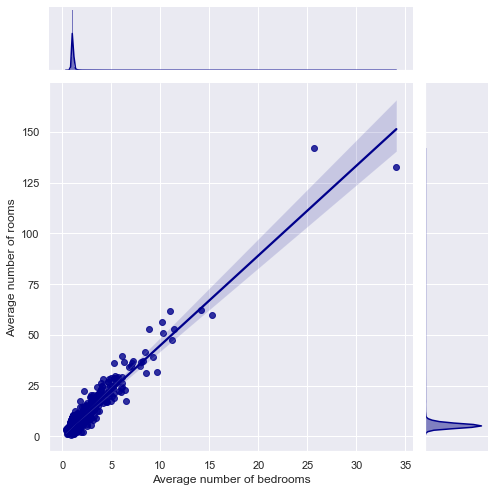

In [28]:
# Set default Seaborn settings
sns.set()
sns.set_context('notebook')  # Set context for plot size and font scale

# Set Seaborn style for plot appearance
sns.set_style('darkgrid')

# Create a jointplot with regression line
g = sns.jointplot(x=data['AveBedrms'],
                  y=data['AveRooms'],
                  height=7,  # Set height of plot
                  color='darkblue',  # Set color of plot points and regression line
                  kind='reg'  # Set plot type to jointplot with regression line
                 )

# Set x and y labels
g.set_axis_labels("Average number of bedrooms", "Average number of rooms")

# Show the plot
plt.show()


Note:
The resulting plot shows a scatter plot of AveBedrms against AveRooms, 
with a regression line fitted to the data. 
The plot shows a positive linear relationship between the two variables, 
indicating that as the number of average rooms in a house increases, 
so does the average number of bedrooms. The distribution of the data points is visualized 
using a kernel density estimate on the edges of the plot. 
Overall, the joint plot provides a visual representation of the relationship between these 
two variables in the California Housing dataset.

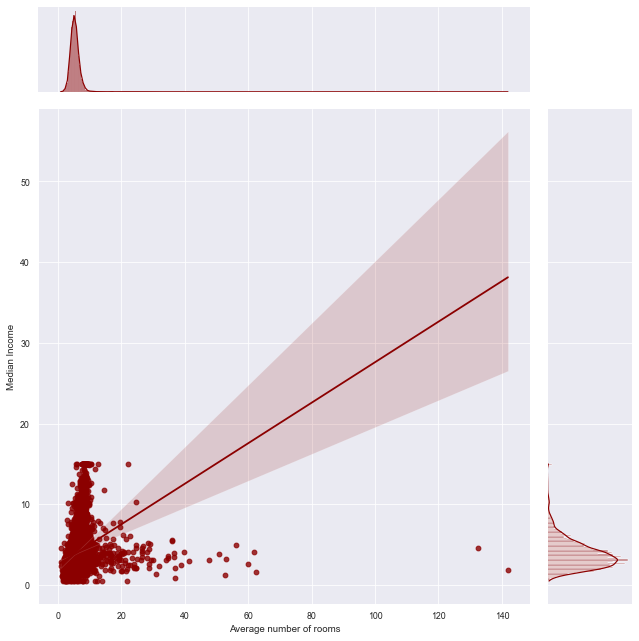

In [29]:

# Set default Seaborn settings
sns.set()
sns.set_context('paper')  # Set context for plot size and font scale
sns.set_style('darkgrid')  # Set Seaborn style for plot appearance

# Create a jointplot with regression line
g = sns.jointplot(x=data['AveRooms'],
                  y=data['MedInc'],
                  color='darkred',  # Set color of plot points and regression line
                  height=9,  # Set height of plot
                  kind='reg'  # Set plot type to jointplot with regression line
                 )

# Set x and y labels
g.set_axis_labels("Average number of rooms", "Median Income")

# Show the plot
plt.show()


### 3.3.2 Negative Correlation

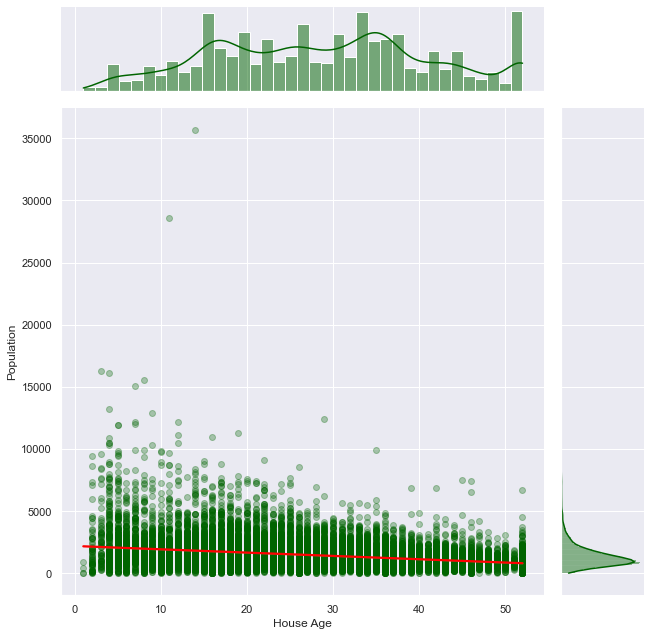

In [30]:

# Set default Seaborn settings
sns.set()
sns.set_context('notebook')  # Set context for plot size and font scale
sns.set_style('darkgrid')  # Set Seaborn style for plot appearance

# Create a jointplot with regression line
g = sns.jointplot(x=data['HouseAge'],
                  y=data['Population'],
                  color='darkgreen',  # Set color of plot points
                  height=9,  # Set height of plot
                  kind='reg',  # Set plot type to jointplot with regression line
                  line_kws={'color':'red'},  # Set color of regression line
                  scatter_kws={'alpha': 0.3}  # Set transparency of plot points
                 )

# Set x and y labels
g.set_axis_labels("House Age", "Population")

# Show the plot
plt.show()


# 4 Modeling

## 4.1 Split The Data(Training and Test)

We split our dataset into two subsets: a training set and a testing set. We use the training set to train the model, and then use the testing set to evaluate the model's performance on new, unseen data. By evaluating the model on data that it has not seen during training, we can get a better estimate of how well the model will perform on new data in the future.

Typically, we split the data into a training set and a testing set in a way that preserves the underlying distribution of the data. For example, we may randomly sample 70% of the data for training and use the remaining 30% for testing. We may also use cross-validation techniques to split the data into multiple training and testing sets.

In [31]:
# Select the target variable
target = data['MedHouseVal']

# Select the feature variables
features = data.drop('MedHouseVal', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Check the split
total_records = len(features)
training_records = len(x_train)
testing_records = len(x_test)
print('Total Records:', total_records)
print('Training Records:', training_records)
print('Testing Records:', testing_records)
print('Training %:', training_records / total_records * 100)
print('Testing %:', testing_records / total_records * 100)



Total Records: 20640
Training Records: 16512
Testing Records: 4128
Training %: 80.0
Testing %: 20.0


In [32]:
# Create a linear regression model object
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(x_train, y_train)

# Calculate the R-squared score for the training data
train_r_squared = round(lr_model.score(x_train, y_train), 2)

# Calculate the R-squared score for the testing data
test_r_squared = round(lr_model.score(x_test, y_test), 2)

# Print the R-squared score for the training data
print('Training R-squared score:', train_r_squared)

# Print the R-squared score for the testing data
print('Testing R-squared score:', test_r_squared)


Training R-squared score: 0.61
Testing R-squared score: 0.6


Note:
An R-squared value of 1 indicates a perfect fit, where all the variance in the target variable is explained by the independent variables. On the other hand, an R-squared value of 0 indicates that the model does not explain any of the variance in the target variable.

In this case, the training data R-squared is 0.61, which means that the model explains 61% of the variance in the target variable in the training data. The testing data R-squared is 0.60, which means that the model explains around 60% of the variance in the target variable in the testing data.

The fact that the testing data R-squared is slightly lower than the training data R-squared suggests that the model may be overfitting to the training data and not generalizing well to new data. This highlights the importance of evaluating the model on testing data to estimate its performance on unseen data.

In [33]:

# Print the intercept of the linear regression model, rounded to 3 decimal places
print('Intercept:', round(lr_model.intercept_, 3))

# Create a pandas DataFrame to display the coefficients of the linear regression model
coef_df = pd.DataFrame(data=lr_model.coef_, index=x_train.columns, columns=['coef'])

# Add a name to the index column
coef_df.index.name = 'Feature Name'

# Display the DataFrame
coef_df


Intercept: -37.487


coef
Feature Name          
MedInc        0.433102
HouseAge      0.009324
AveRooms     -0.100333
AveBedrms     0.615219
Population   -0.000003
AveOccup     -0.004782
Latitude     -0.429077
Longitude    -0.441484

# 5 Evaluation

## 5.1 Data Transformation

In [34]:
target.skew()

0.9777632739098345

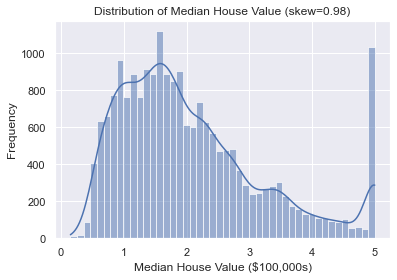

In [35]:

# Plot a histogram of the target variable with a density curve
sns.histplot(target, kde=True)

# Add a title and axis labels
plt.title(f'Distribution of Median House Value (skew={target.skew():.2f})')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Note: 
Skewness is a measure of the asymmetry of a probability distribution. If the skewness is zero, the distribution is perfectly symmetrical. If the skewness is positive, the distribution is skewed to the right (the tail is longer on the right side), and if the skewness is negative, the distribution is skewed to the left (the tail is longer on the left side).

A skewness value of 0.9777632739098335 indicates that the distribution is positively skewed, meaning that it is skewed to the right. In other words, the tail of the distribution is longer on the right side than on the left side.

We will use the logarithmic transformation which is commonly used in data analysis and modeling because it can help to transform data that has a non-normal distribution into a more normally distributed form.
By taking the logarithm of the data, we can reduce the impact of extreme values and make the data more normally distributed. The following chart is the result of logarithmic transformation which reduced the skewness.

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


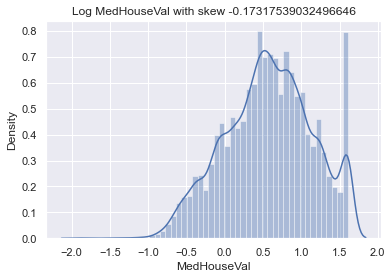

In [36]:
target_log = np.log(target)
sns.distplot(target_log)
plt.title(f'Log MedHouseVal with skew {target_log.skew()}')
plt.show()

The skewness value of -0.17317539032496326 indicates that the logarithmic transformation has reduced the skewness of the MedHouseVal target variable, compared to the original distribution of the variable. Since the skewness value is negative, this suggests that the distribution is now slightly left-skewed, meaning that there may be some values in the lower range that are more extreme than what would be expected in a normal distribution.

## 5.2 Regresssion Using Logarithmic Transformation

In [37]:
# Use log prices for the target variable
target_log = np.log(target)

# Split the data into training and testing sets
# The features are in the 'feature' variable
# The target values with log prices are in the 'target_log' variable
# The testing set size is 20% of the total data
# A random seed of 10 is used to ensure reproducibility
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(features, target_log, test_size=0.2, random_state=10)

# Create a linear regression object
regr_log = LinearRegression()

# Fit the linear regression model using the training data
regr_log.fit(x_train_log, y_train_log)

# Calculate the R-squared value for the training data
training_r_squared_log = round(regr_log.score(x_train_log, y_train_log), 2)

# Calculate the R-squared value for the testing data
testing_r_squared_log = round(regr_log.score(x_test_log, y_test_log), 2)

# Print the R-squared values for the training and testing data with log prices
print('Training data r-squared (logarithmic):', training_r_squared_log)
print('Testing data r-squared (logarithmic):', testing_r_squared_log)

# Print the intercept of the linear regression model without log prices
print('Intercept:', round(lr_model.intercept_, 3))

# Print the intercept of the linear regression model with log prices
print('Intercept (logarithmic):', round(regr_log.intercept_, 3))

# Create a DataFrame to store the coefficients of the linear regression model with log prices
coef_df_log = pd.DataFrame(data=regr_log.coef_, index=x_train_log.columns, columns=['coef_log'])

# Check if the training data R-squared value is improved with log prices
if training_r_squared_log > train_r_squared:
    print("The training data skew is minimized", f' from  {train_r_squared} to {training_r_squared_log} it means that the model is improved and better fit')
else:
    print("The training data skew is not minimized")

# Check if the testing data R-squared value is improved with log prices
if testing_r_squared_log > test_r_squared:
    print("The testing data skew is minimized", f' from  {test_r_squared} to {testing_r_squared_log}it means that the model is improved and better fit')
else:
    print("The testing data skew is not minimized")

translate_coef_log = pd.DataFrame(data=np.e** regr_log.coef_,
                                  index=x_train_log.columns, 
                                  columns=['translate_coef_log'])

merge_all =[coef_df,coef_df_log,translate_coef_log]
pd.concat(merge_all, axis=1)


Training data r-squared (logarithmic): 0.62
Testing data r-squared (logarithmic): 0.6
Intercept: -37.487
Intercept (logarithmic): -24.57
The training data skew is minimized  from  0.61 to 0.62 it means that the model is improved and better fit
The testing data skew is not minimized


coef  coef_log  translate_coef_log
Feature Name                                        
MedInc        0.433102  0.186068            1.204505
HouseAge      0.009324  0.002279            1.002281
AveRooms     -0.100333 -0.030865            0.969607
AveBedrms     0.615219  0.224873            1.252163
Population   -0.000003  0.000008            1.000008
AveOccup     -0.004782 -0.002259            0.997744
Latitude     -0.429077 -0.289071            0.748959
Longitude    -0.441484 -0.289146            0.748903

## 5.3 P-value and Statistical Significance


In [38]:

# Add a constant column to the x_train_log dataset using the add_constant method from the statsmodels library
x_const = sm.add_constant(x_train_log)

# Create an OLS regression model using the OLS method from the statsmodels library.
# Pass the y_train_log dependent variable and x_const independent variable as parameters.
mod = sm.OLS(y_train_log, x_const)


# Create a DataFrame named results with two columns named 'coef_Log' and 'p-value'.
modfit = mod.fit()

# Create a DataFrame named results with two columns named 'coef_Log' and 'p-value'.
# The values in the 'coef_Log' column are the regression coefficients rounded to four decimal places.
# The values in the 'p-value' column are the p-values for each coefficient, also rounded to four decimal places.
results=pd.DataFrame({'coef': round(modfit.params,4), 'p-value': round(modfit.pvalues, 4)})

#Print the result
results

coef  p-value
const      -24.5705   0.0000
MedInc       0.1861   0.0000
HouseAge     0.0023   0.0000
AveRooms    -0.0309   0.0000
AveBedrms    0.2249   0.0000
Population   0.0000   0.0014
AveOccup    -0.0023   0.0000
Latitude    -0.2891   0.0000
Longitude   -0.2891   0.0000

Note:
A low p-value (less than 0.05) indicates that the feature is statistically significant and has a strong linear relationship with the target variable. On the other hand, a high p-value (greater than 0.05) indicates that the feature is not statistically significant and does not have a strong linear relationship with the target variable.


## 5.4 Multicollinearity
In order to determine whether multicollinearity is present in the California Housing dataset, it would be necessary to perform a detailed analysis of the dataset using variance inflaction factor VIF.

In general, a VIF value greater than 5 or  in some case greater than 10 is considered to be a sign of significant multicollinearity, although the specific threshold may vary depending on the specific application and the number of independent variables in the model. If significant multicollinearity is detected, it may be necessary to remove one or more of the highly correlated independent variables from the model in order to improve the stability and accuracy of the regression estimates.


### 5.4.1 VIF

In [39]:
variance_inflation_factor(exog=x_const.values, exog_idx=1)

2.4741199441522226

In [40]:
# len(x_const.columns)
x_const.shape[1]


9

### 5.4.2 BIC

In [41]:
# 1st Model with all features

x_const = sm.add_constant(x_train_log)

mod = sm.OLS(y_train_log, x_const)

modfit = mod.fit()
results=pd.DataFrame({'coef': round(modfit.params,3), 'p-value': round(modfit.pvalues, 3)})

print('r-squared ', round(modfit.rsquared,3))
print('BIC ', round(modfit.bic,3))

r-squared  0.617
BIC  12467.657


In [42]:
# 2nd Model with Population feature removed

x_const = sm.add_constant(x_train_log)
x_const = x_const.drop(['Population'],axis=1)

mod = sm.OLS(y_train_log, x_const)

modfit_population = mod.fit()
results_population=pd.DataFrame({'coef': round(modfit_population.params,3),
                                 'p-value': round(modfit_population.pvalues, 3)})

print('r-squared ', round(modfit_population.rsquared,3))
print('BIC ', round(modfit_population.bic,3))

r-squared  0.617
BIC  12468.129


Note: when comparing two models using BIC, the model with the lowest BIC value is preferred,
as it indicates a better balance between model fit and complexity.
We observe that after dropping one feature from the original model, the BIC value increases slightly from 12467.657 to 12468.129. This means that the new model with one less feature has a slightly worse fit to the data compared to the original model.

However, we need to consider the magnitude of the change in BIC value. A difference of 0.472 between the two BIC values is quite small, and it may not be significant enough to warrant dropping the feature. Therefore, we may need to conduct further analysis, such as examining the statistical significance and effect size of the feature, before making a decision about whether to include or drop the feature in the model.
The significance of the difference in BIC values depends on the context of the problem, the size of the data set, and the complexity of the models being compared.

As a general rule, a difference in BIC values of 2 or more is considered to provide positive evidence in favor of the model with the lower BIC value. This means that if the difference in BIC values between two models is 2 or more, we can conclude that the model with the lower BIC value is preferred with some confidence.

However, some researchers may consider a difference in BIC values of 6 or more to be strong evidence in favor of the model with the lower BIC value, while others may require a larger difference to make a decision. Ultimately, the choice of threshold for the significance of the difference in BIC values depends on the specific context of the problem and the researcher's preference.

## 5.5 Residuals

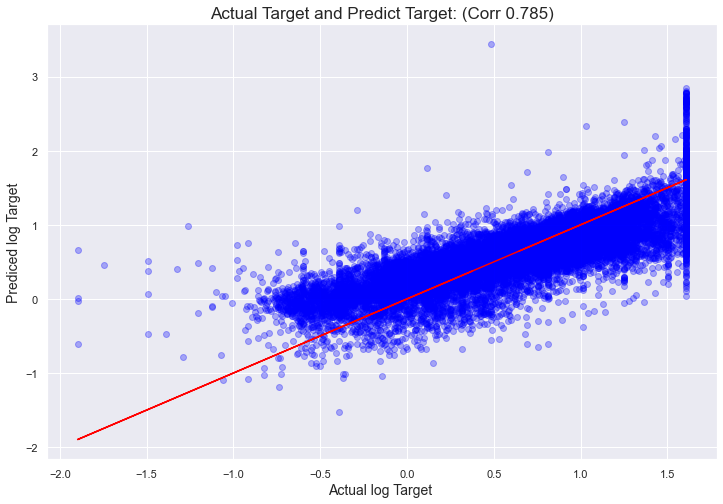

In [43]:

# transformed using log Target 
target_log = np.log(data['MedHouseVal']) # Use log Target


x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(features, target_log, 
                                                    test_size=0.2, random_state=10)


x_const_log = sm.add_constant(x_train_log)
mod_log = sm.OLS(y_train_log, x_const_log)
resu_log = mod_log.fit()

# Actual Target and Predict Target
cor_log = round(y_train_log.corr(resu_log.fittedvalues), 3)
plt.figure(figsize=(12,8))
plt.scatter(x=y_train_log, y=resu_log.fittedvalues, c='blue', alpha=0.3)
plt.plot(y_train_log, y_train_log, color='red')

plt.xlabel('Actual log Target ', fontsize=14)
plt.ylabel('Prediced log Target', fontsize=14)
plt.title(f'Actual Target and Predict Target: (Corr {cor_log})', fontsize=17)

plt.show()



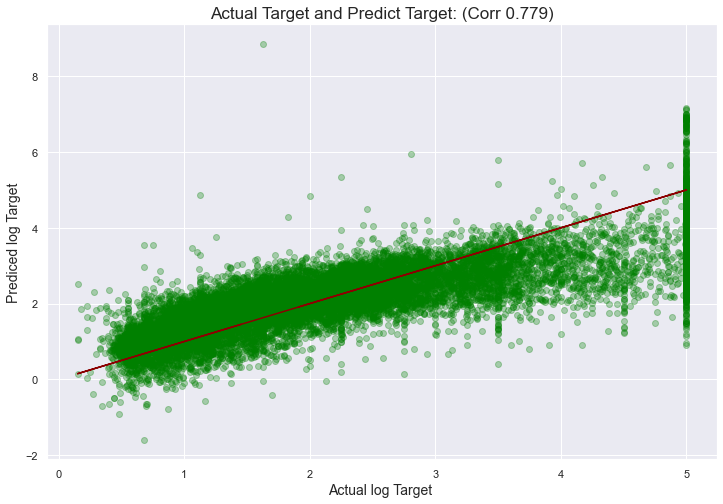

In [44]:

# with original Value 
target_org = data['MedHouseVal'] # Use Target

x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(features, target_org, 
                                                    test_size=0.2, random_state=10)

x_const_org = sm.add_constant(x_train_org)
mod_org = sm.OLS(y_train_org, x_const_org)
resu_org = mod_org.fit()

# Actual Target and Predict Target
cor_org = round(y_train.corr(resu_org.fittedvalues), 3)
plt.figure(figsize=(12,8))
plt.scatter(x=y_train_org, y=resu_org.fittedvalues, c='green', alpha=0.3)
plt.plot(y_train_org, y_train_org, color='darkred')

plt.xlabel('Actual log Target ', fontsize=14)
plt.ylabel('Prediced log Target', fontsize=14)
plt.title(f'Actual Target and Predict Target: (Corr {cor_org})', fontsize=17)

plt.show()


## 5.6 Check Residual for Normality

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


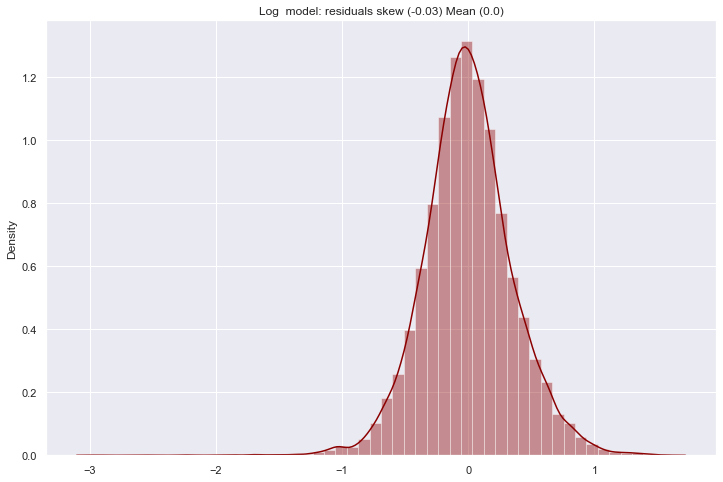

In [45]:
# Checking Normality of Log Residuals - Target
residual_log_skew = round(resu_log.resid.skew(), 2)
residual_log_mean = round(resu_log.resid.mean(), 2)

plt.figure(figsize=(12,8))
sns.distplot(resu_log.resid, color='darkred')
plt.title(f'Log  model: residuals skew ({residual_log_skew}) Mean ({residual_log_mean})')
plt.show()

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


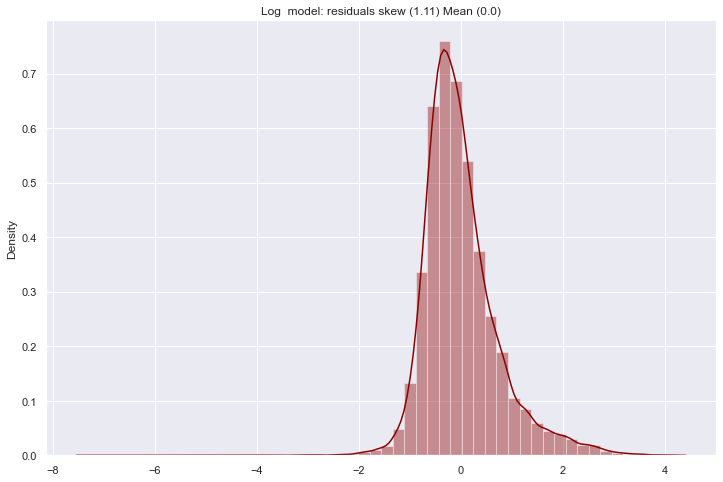

In [46]:
# Checking Normality of Orginal Residuals - Target
residual_org_skew = round(resu_org.resid.skew(), 2)
residual_org_mean = round(resu_org.resid.mean(), 2)

plt.figure(figsize=(12,8))
sns.distplot(resu_org.resid, color='darkred')
plt.title(f'Log  model: residuals skew ({residual_org_skew}) Mean ({residual_org_mean})')
plt.show()
# In one model the residuals skew is 1.11 and mean is 0.0, and in second model teh residual skew is -0.303
# and mean is 0.0. how do you compare and interpret and which one is better

Note:
Based on above two charts, the first model has a positively skewed distribution of residuals, with a skewness value of 1.11. This indicates that there are more extreme positive residuals than negative residuals, and the distribution is skewed to the right.

The second model has a negatively skewed distribution of residuals, with a skewness value of -0.303. This indicates that there are more extreme negative residuals than positive residuals, and the distribution is skewed to the left.

Regarding which one is better, it is not appropriate to use skewness alone as a criterion for comparing the models. Other factors such as the residual mean square error (RMSE), R-squared value, and the validity of the model assumptions should be considered, which we will be doing it in bellow section. In general, a model with a lower RMSE and a higher R-squared value is preferred.

## 5.7 MSE,RMSE,and R-squared

In [47]:
# MSE,RMSE,and R-squared for Original Target
mse_org = round(resu_org.mse_resid, 3)
rsquared_org = round(resu_org.rsquared, 3)
rmse_org = round(np.sqrt(mse_org),3)


# MSE,RMSE,and R-squared for Log Target
mse_log = round(resu_log.mse_resid, 3)
rsquared_log = round(resu_log.rsquared, 3)
rmse_log = round(np.sqrt(mse_log),3)


combine = pd.DataFrame({'R-Squared': [rsquared_org, rsquared_log],
             'MSE': [mse_org,mse_log], 
             'RMSE': [rmse_org,rmse_log]}, 
            index=['Normal Model', 'Log Model'])
combine

R-Squared    MSE   RMSE
Normal Model      0.607  0.520  0.721
Log Model         0.617  0.124  0.352

Note
Comparing the two models, we can see that the Log model has a higher R-squared value of 0.617, indicating that it explains more of the variance in the target variable than the normal model with an R-squared value of 0.607. 

Additionally, the log model has a much lower mean squared error (MSE) of 0.124 compared to the normal model's MSE of 0.520. This indicates that the residuals in the log model are smaller, and the model is making more accurate predictions.

Finally, when looking at the root mean squared error (RMSE), we can see that the log model also performs better, with an RMSE of 0.352 compared to the normal model's RMSE of 0.721.

Therefore, based on these evaluation metrics, we can conclude that the log model is the better model. It has a higher R-squared value, lower MSE and lower RMSE, indicating better overall performance in predicting the target variable.


In [48]:
def get_bands(price: int, sd: int):

    upper_bound = np.log(price) + sd*np.sqrt(mse_log)
    lower_bound = np.log(price) - sd*np.sqrt(mse_log)
    print(f'The upper bound in medium house value for {price * 100000} $ in {sd} Std is: ', round(np.e**upper_bound * 100000,2))
    print(f'The lower bound in medium house value for {price * 100000} $ in {sd} Std is: ', round(np.e**lower_bound * 100000,2))

    if not isinstance(price, int) or not isinstance(sd, int):
        raise TypeError("Both arguments must be of type int")

In [49]:
get_bands(sd=1,price=4)

The upper bound in medium house value for 400000 $ in 1 Std is:  568840.96
The lower bound in medium house value for 400000 $ in 1 Std is:  281273.7


# 6 Evaluation (Final Stage):
In this stage, we will use a function to predict the price based on given paramaters. The following code can be used anywhere regardless of what we have done in the above section. We make it independent because if we want only to make a prediction, then we only need to use the following codes.

In [50]:
# imports libraries
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

In [51]:
housing = fetch_california_housing()
features = pd.DataFrame(data=housing.data, columns=housing.feature_names)

log_medhouseval = np.log(housing.target)
target = pd.DataFrame(log_medhouseval, columns=['MedHouseVal'])


In [52]:
MedInc_idx = 0
HouseAge_idx =1
AveRooms_idx =  2
AveBedrms_idx = 3
Population_idx = 4
AveOccup_idx = 5
housing_stats = features.mean().values.reshape(1, 8)

In [53]:
# Fitting the linear regression model
reg_model = LinearRegression().fit(features, target)

# Predicting the target values based on the features
predicted_vals = reg_model.predict(features)

# Calculating the MSE and RMSE using sklearn
MSE = mean_squared_error(target, predicted_vals)
RMSE = np.sqrt(MSE)

# Printing the results
print(f"Mean Squared Error: {MSE:.2f}")
print(f"Root Mean Squared Error: {RMSE:.2f}")


Mean Squared Error: 0.12
Root Mean Squared Error: 0.35


In [54]:
def fn_log_estimate(*args, **kwargs):
    
    """
    The function accepts variable arguments using *args and keyword arguments using **kwargs. 
   
    The required arguments are:

    average_rooms: Average number of rooms per house in the area
    average_bedrooms: Average number of bedrooms per house in the area
    today_median_price: Today's median price of houses in the area i.e. California
    
    The optional keyword arguments are:

    median_income: Median income in the area
    house_age: Average age of houses in the area
    population: Population of the area
    average_occupation: Average occupancy per house in the area
    high_confidence: Boolean value indicating whether to calculate a 95% confidence interval
    (default) or 68% confidence interval.
    
    The function first checks whether any arguments were provided. 
    If not, it raises a ValueError. It then sets default values for the optional keyword arguments
    and updates them with any values provided.

    Next, it assigns the input arguments to specific variables and uses them to update some values 
    in a pre-defined housing_stats array. It then uses a pre-trained regression model (reg_model) 
    to predict the logarithmic price of the house based on the input parameters.

    Depending on the high_confidence value, the function calculates either a 95% or 68% confidence 
    interval for the predicted logarithmic price. It then converts the predicted logarithmic 
    price and confidence interval into actual USD prices using a scaling factor based on the 
    median house price in the area.

    Finally, the function prints the estimated house price along with the confidence interval.
    """
    
    if not args:
        raise ValueError("No arguments provided")
        
    # Define default values for optional arguments
    defaults = {
        'median_income': False,
        'house_age': False,
        'population': False,
        'average_occupation': False,
        'high_confidence': True
    }
    # Update defaults with any keyword arguments passed
    defaults.update(kwargs)
    # Use *args to pass any non-keyword arguments
    average_rooms, average_bedrooms, today_median_price,*_ = args
    
    housing_stats[0][AveRooms_idx] = average_rooms
    housing_stats[0][AveBedrms_idx] = average_bedrooms
    housing_stats[0][MedInc_idx] =  defaults['median_income']
    housing_stats[0][HouseAge_idx] = defaults['house_age']
    housing_stats[0][Population_idx] = defaults['population']
    housing_stats[0][AveOccup_idx] = defaults['average_occupation']
 
    estimate_log = reg_model.predict(housing_stats)[0][0]
    
    if defaults['high_confidence']:
        upper_bound = estimate_log + 2*RMSE
        lower_bound = estimate_log - 2*RMSE
        interval = 95
    else:
        upper_bound = estimate_log + RMSE
        lower_bound = estimate_log - RMSE
        interval = 68
        
    #today_median_price = 5.83
    scale_factor = today_median_price / np.median(housing.target)

    estimate_USD = np.around(np.e**estimate_log * 100000 * scale_factor,-2)
    upper_bound_USD = np.around(np.e**upper_bound * 100000 * scale_factor,-2)
    lower_bound_USD = np.around(np.e**lower_bound * 100000 * scale_factor ,-2)
    
    print(f'The estimated house price is {estimate_USD}.')
    print(f'At {interval}% confidence interval the range is:')
    print(f'USD {lower_bound_USD} USD Minimum  and  {upper_bound_USD} USD Maximumn.')



In [55]:
fn_log_estimate(5,1,5.83,high_confidence=False)

The estimated house price is 257000.0.
At 68% confidence interval the range is:
USD 180500.0 USD Minimum  and  365900.0 USD Maximumn.


C:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
